In [ ]:
import tensorflow as tf

print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Use GPU for TensorFlow
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
print("Using GPU:", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Using GPU: True


In [ ]:
!nvidia-smi

Wed Mar 26 02:20:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P0             26W /   70W |     102MiB /  15360MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Install Essential Libraries
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pip install pydub

In [ ]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import pandas as pd
import pathlib
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
import time
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import random
import shutil
from sklearn.model_selection import train_test_split
from google.colab import drive
from pydub import AudioSegment
import librosa
import librosa.display
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import torch
import torch.nn as nn
import torch.nn.functional as F

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# mount Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# SiLU Activation
class SiLU(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

# Basic Conv Block
class Conv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1, groups=1):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False, groups=groups)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001, momentum=0.03)
        self.act = SiLU()

    def forward(self, x):
        return self.act(self.bn(self.conv(x)))

# Bottleneck Block
class Bottleneck(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.cv1 = Conv(in_channels, out_channels, 3, 1, 1)
        self.cv2 = Conv(out_channels, out_channels, 3, 1, 1)

    def forward(self, x):
        return x + self.cv2(self.cv1(x))

# C2F Block
class C2f(nn.Module):
    def __init__(self, in_channels, out_channels, n=1):
        super().__init__()
        self.cv1 = Conv(in_channels, out_channels, 1, 1, 0)
        self.cv2 = Conv(in_channels + out_channels, out_channels, 1, 1, 0)
        self.m = nn.ModuleList([Bottleneck(out_channels // 2, out_channels // 2) for _ in range(n)])

    def forward(self, x):
        y = [self.cv1(x)]
        for m in self.m:
            y.append(m(y[-1]))
        return self.cv2(torch.cat(y, 1))

# SPPF Block
class SPPF(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.cv1 = Conv(in_channels, out_channels, 1, 1, 0)
        self.cv2 = Conv(out_channels * 4, out_channels, 1, 1, 0)
        self.m = nn.MaxPool2d(kernel_size=5, stride=1, padding=2)

    def forward(self, x):
        y = [self.cv1(x)]
        for _ in range(3):
            y.append(self.m(y[-1]))
        return self.cv2(torch.cat(y, 1))

# Detection Head (placeholder)
class Detect(nn.Module):
    def __init__(self, num_classes=15):
        super().__init__()
        self.head = nn.Sequential(
            nn.Conv2d(128, 128, 3, 1, 1),
            nn.ReLU(),
            nn.Conv2d(128, num_classes, 1)
        )

    def forward(self, x):
        return self.head(x)

# YOLOv8-like Model
class YOLOv8(nn.Module):
    def __init__(self, num_classes=15):
        super().__init__()
        self.backbone = nn.Sequential(
            Conv(3, 16, 3, 2),
            Conv(16, 32, 3, 2),
            C2f(32, 32, 1),
            Conv(32, 64, 3, 2),
            C2f(64, 64, 2),
            Conv(64, 128, 3, 2),
            C2f(128, 128, 2),
            Conv(128, 256, 3, 2),
            C2f(256, 256, 1),
            SPPF(256, 128)
        )
        self.head = Detect(num_classes)

    def forward(self, x):
        x = self.backbone(x)
        x = self.head(x)
        return x


In [ ]:
class YOLODataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.image_files = sorted([f for f in os.listdir(images_dir) if f.endswith(".jpg") or f.endswith(".png")])
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.images_dir, img_name)
        label_path = os.path.join(self.labels_dir, img_name.replace(".jpg", ".txt").replace(".png", ".txt"))

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        boxes = []
        with open(label_path, "r") as f:
            for line in f:
                cls, xc, yc, w, h = map(float, line.strip().split())
                boxes.append([cls, xc, yc, w, h])
        boxes = torch.tensor(boxes)

        return image, boxes


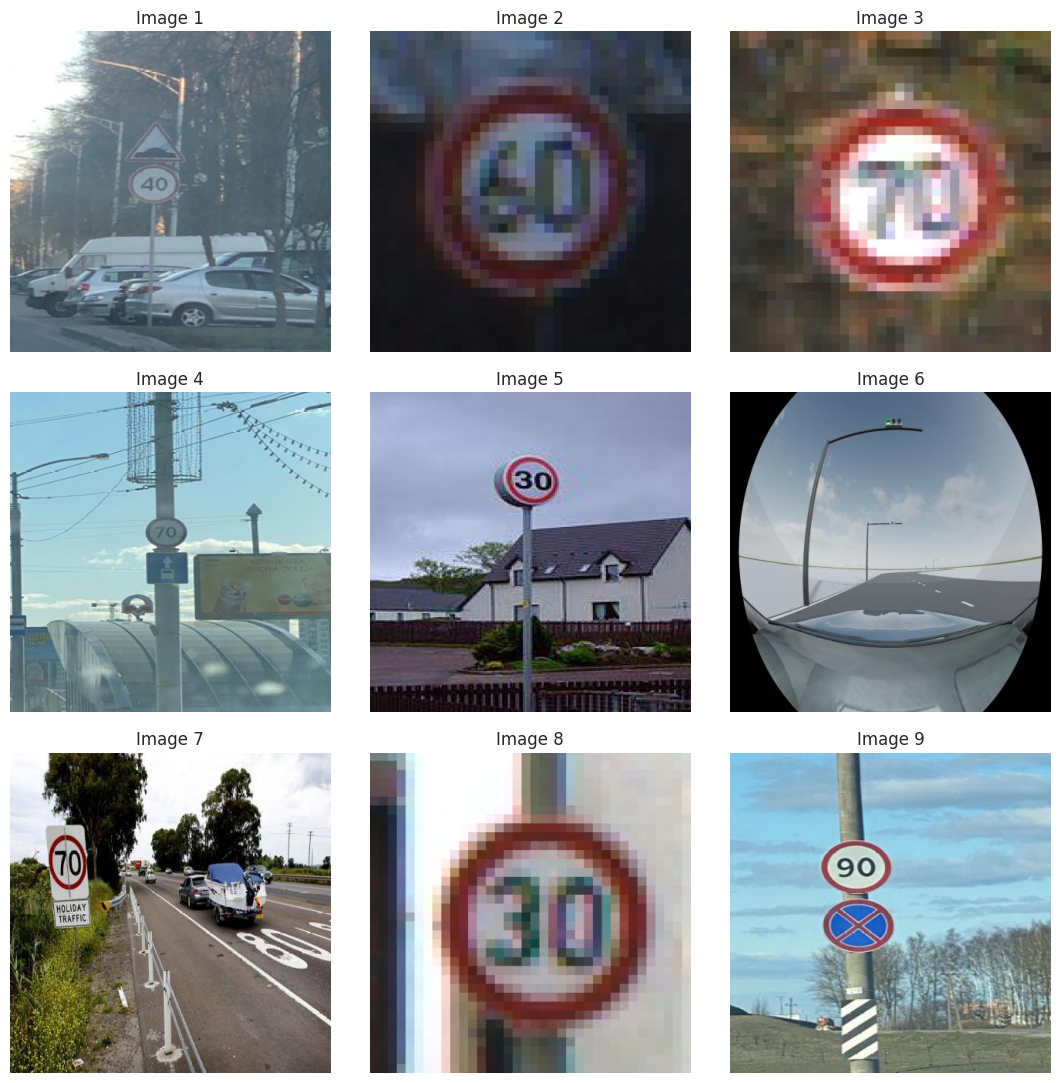

In [ ]:
Image_dir = '/content/drive/MyDrive/DSAN6500_Miniproject3/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Get the size of the image
image = cv2.imread("/content/drive/MyDrive/DSAN6500_Miniproject3/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



image 1/1 /content/drive/MyDrive/DSAN6500_Miniproject3/car/train/images/00000_00004_00012_png.rf.92622c0f045f6784209bb0676912894e.jpg: 640x640 (no detections), 11.8ms
Speed: 4.7ms preprocess, 11.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


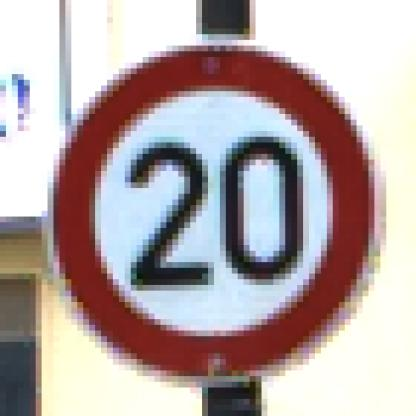

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/drive/MyDrive/DSAN6500_Miniproject3/car/train/images/00000_00004_00012_png.rf.92622c0f045f6784209bb0676912894e.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
!pip install --upgrade ultralytics ray


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 MB 12.3 MB/s eta 0:00:00


In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/drive/MyDrive/DSAN6500_Miniproject3/car/data.yaml",epochs=25, project="/content/drive/MyDrive/DSAN6500_Miniproject3/outputs", name="train_1")

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/DSAN6500_Miniproject3/car/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/DSAN6500_Miniproject3/outputs, name=train_1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fal

100%|██████████| 755k/755k [00:00<00:00, 88.6MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 295MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/DSAN6500_Miniproject3/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/DSAN6500_Miniproject3/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/DSAN6500_Miniproject3/outputs/train_1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/DSAN6500_Miniproject3/outputs/train_1
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25       2.1G     0.8439      3.467      1.197         33        640: 100%|██████████| 221/221 [23:02<00:00,  6.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [04:28<00:00, 10.33s/it]

                   all        801        944      0.233      0.404      0.255      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.57G     0.7656      2.555      1.107         25        640: 100%|██████████| 221/221 [01:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.71it/s]


                   all        801        944      0.291      0.465      0.308      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.58G     0.7367      2.146      1.077         22        640: 100%|██████████| 221/221 [01:17<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.67it/s]


                   all        801        944       0.38      0.572      0.463      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25       2.6G     0.7211      1.856      1.064         27        640: 100%|██████████| 221/221 [01:19<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.45it/s]


                   all        801        944      0.719      0.578      0.691      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25       2.6G     0.7103      1.558      1.054         25        640: 100%|██████████| 221/221 [01:18<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.45it/s]

                   all        801        944      0.821      0.606      0.747       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       2.6G      0.687      1.379      1.041         22        640: 100%|██████████| 221/221 [01:17<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.46it/s]

                   all        801        944      0.757      0.653      0.751       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       2.6G     0.6588      1.244      1.035         30        640: 100%|██████████| 221/221 [01:17<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.58it/s]

                   all        801        944      0.841      0.708       0.82      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.61G      0.646      1.137      1.016         26        640: 100%|██████████| 221/221 [01:17<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.92it/s]

                   all        801        944      0.867      0.741       0.85      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.62G     0.6482      1.067      1.012         19        640: 100%|██████████| 221/221 [01:17<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.57it/s]

                   all        801        944       0.89       0.79      0.893      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.62G     0.6302      1.017      1.006         25        640: 100%|██████████| 221/221 [01:16<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.39it/s]

                   all        801        944      0.905      0.793      0.895      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.62G     0.6339     0.9808      1.011         17        640: 100%|██████████| 221/221 [01:17<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]

                   all        801        944      0.909      0.823        0.9      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.62G     0.6152     0.9463      1.002         26        640: 100%|██████████| 221/221 [01:18<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.80it/s]

                   all        801        944       0.94       0.82      0.908      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.62G     0.6087     0.8999     0.9994         25        640: 100%|██████████| 221/221 [01:17<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.55it/s]

                   all        801        944      0.918      0.803        0.9      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.62G     0.5958     0.8753     0.9899         19        640: 100%|██████████| 221/221 [01:17<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]

                   all        801        944      0.922      0.845      0.925      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.62G      0.596     0.8337     0.9833         20        640: 100%|██████████| 221/221 [01:17<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.68it/s]

                   all        801        944      0.936      0.843      0.921      0.787


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.62G     0.5851     0.6189     0.9581         10        640: 100%|██████████| 221/221 [01:16<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.83it/s]

                   all        801        944      0.938      0.859      0.934      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.62G     0.5754      0.587     0.9496         11        640: 100%|██████████| 221/221 [01:14<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.90it/s]

                   all        801        944      0.937      0.864      0.934      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.62G     0.5582     0.5384     0.9413         10        640: 100%|██████████| 221/221 [01:13<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.91it/s]


                   all        801        944      0.955      0.868      0.943       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.62G      0.553     0.5234     0.9395         10        640: 100%|██████████| 221/221 [01:14<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.90it/s]

                   all        801        944      0.948      0.869      0.948      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.62G      0.548     0.5004     0.9387         14        640: 100%|██████████| 221/221 [01:13<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.80it/s]

                   all        801        944      0.959      0.869      0.947      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.63G     0.5417     0.4668     0.9263         12        640: 100%|██████████| 221/221 [01:14<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.70it/s]

                   all        801        944      0.929      0.891      0.951      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.63G     0.5292     0.4642      0.925         18        640: 100%|██████████| 221/221 [01:15<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.83it/s]

                   all        801        944      0.961      0.884      0.955      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.63G     0.5194     0.4508     0.9267         12        640: 100%|██████████| 221/221 [01:14<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944       0.94        0.9      0.956      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.63G      0.515     0.4262     0.9149         10        640: 100%|██████████| 221/221 [01:18<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.57it/s]

                   all        801        944      0.953      0.895      0.957      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.64G     0.5094     0.4131     0.9153         12        640: 100%|██████████| 221/221 [01:13<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.58it/s]

                   all        801        944      0.953      0.893      0.959       0.83



25 epochs completed in 1.043 hours.
Optimizer stripped from /content/drive/MyDrive/DSAN6500_Miniproject3/outputs/train_1/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/DSAN6500_Miniproject3/outputs/train_1/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/DSAN6500_Miniproject3/outputs/train_1/weights/best.pt...
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]


                   all        801        944      0.953      0.892      0.958       0.83
           Green Light         87        122      0.884      0.689      0.827      0.505
             Red Light         74        108      0.878      0.713      0.829      0.512
       Speed Limit 100         52         52      0.964      0.942      0.986      0.878
       Speed Limit 110         17         17      0.944          1      0.995       0.92
       Speed Limit 120         60         60      0.981      0.876      0.989      0.918
        Speed Limit 20         56         56      0.985      0.982      0.986      0.865
        Speed Limit 30         71         74      0.953      0.959      0.988      0.923
        Speed Limit 40         53         55      0.907      0.982      0.988      0.883
        Speed Limit 50         68         71      0.995      0.803      0.948      0.851
        Speed Limit 60         76         76      0.919      0.908       0.96      0.876
        Speed Limit 7

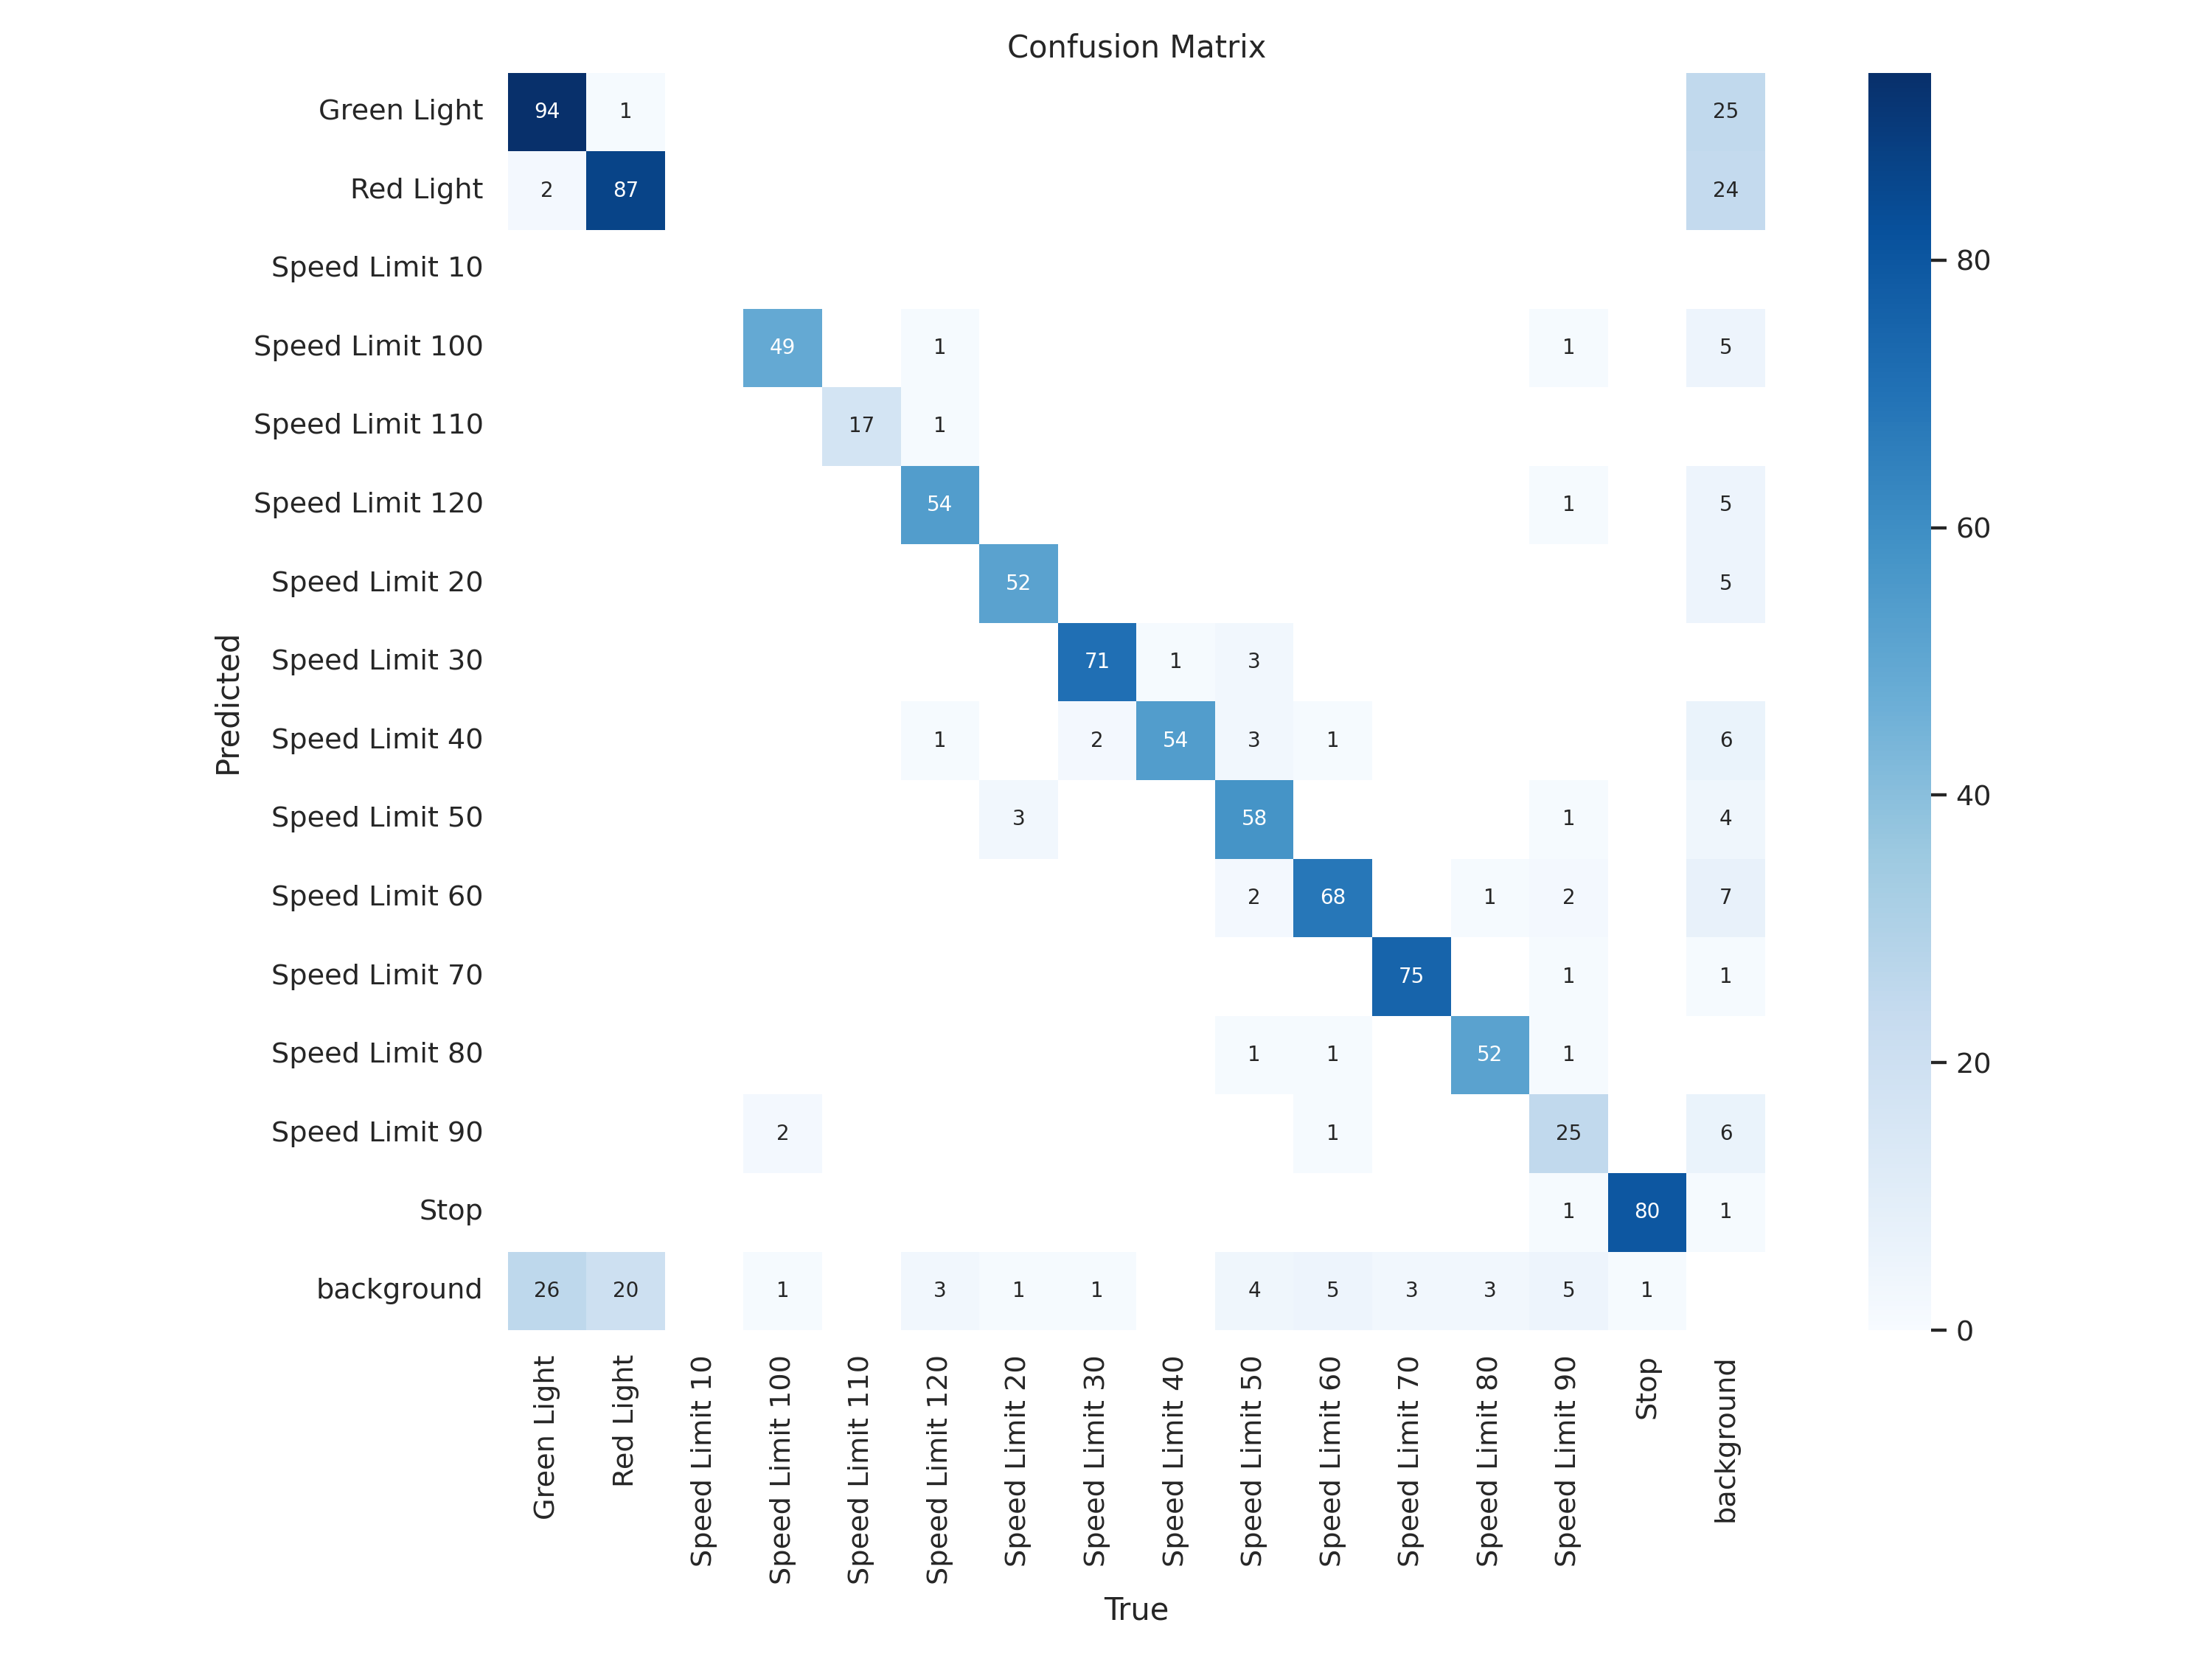

In [ ]:
from IPython.display import Image, display

conf_matrix_path = "/content/drive/MyDrive/DSAN6500_Miniproject3/outputs/train_1/confusion_matrix.png"
display(Image(filename=conf_matrix_path))


In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/DSAN6500_Miniproject3/outputs/train_1/weights/best.pt")

results = model.val()


Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/DSAN6500_Miniproject3/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.04it/s]


                   all        801        944      0.953      0.893      0.958      0.832
           Green Light         87        122      0.885      0.696      0.826      0.507
             Red Light         74        108      0.877      0.723      0.828      0.511
       Speed Limit 100         52         52      0.963      0.942      0.986      0.881
       Speed Limit 110         17         17      0.944          1      0.995       0.92
       Speed Limit 120         60         60      0.981      0.876      0.989      0.916
        Speed Limit 20         56         56      0.985      0.982      0.986      0.869
        Speed Limit 30         71         74      0.952      0.959      0.988      0.924
        Speed Limit 40         53         55      0.906      0.982      0.988      0.879
        Speed Limit 50         68         71      0.994      0.803      0.948      0.855
        Speed Limit 60         76         76      0.919      0.908       0.96      0.876
        Speed Limit 7

In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/drive/MyDrive/DSAN6500_Miniproject3/outputs/train_1/weights/best.pt")

# Run prediction on validation set with `save_conf=True` to retain confidences
results = model.val(save_json=True, save_conf=True, conf=0.001)


Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/DSAN6500_Miniproject3/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.16it/s]


                   all        801        944      0.953      0.893      0.958      0.832
           Green Light         87        122      0.885      0.696      0.826      0.507
             Red Light         74        108      0.877      0.723      0.828      0.511
       Speed Limit 100         52         52      0.963      0.942      0.986      0.881
       Speed Limit 110         17         17      0.944          1      0.995       0.92
       Speed Limit 120         60         60      0.981      0.876      0.989      0.916
        Speed Limit 20         56         56      0.985      0.982      0.986      0.869
        Speed Limit 30         71         74      0.952      0.959      0.988      0.924
        Speed Limit 40         53         55      0.906      0.982      0.988      0.879
        Speed Limit 50         68         71      0.994      0.803      0.948      0.855
        Speed Limit 60         76         76      0.919      0.908       0.96      0.876
        Speed Limit 7

In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/drive/MyDrive/DSAN6500_Miniproject3/outputs/train_1/weights/best.pt")

# Run validation and save predictions (with confidence)
results = model.val(
    save_json=True,
    save_conf=True,
    project="/content/drive/MyDrive/DSAN6500_Miniproject3/outputs",
    name="val_1",  # <- validation folder
    conf=0.001
)



Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/DSAN6500_Miniproject3/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:13<00:00,  3.79it/s]


                   all        801        944      0.953      0.893      0.958      0.832
           Green Light         87        122      0.885      0.696      0.826      0.507
             Red Light         74        108      0.877      0.723      0.828      0.511
       Speed Limit 100         52         52      0.963      0.942      0.986      0.881
       Speed Limit 110         17         17      0.944          1      0.995       0.92
       Speed Limit 120         60         60      0.981      0.876      0.989      0.916
        Speed Limit 20         56         56      0.985      0.982      0.986      0.869
        Speed Limit 30         71         74      0.952      0.959      0.988      0.924
        Speed Limit 40         53         55      0.906      0.982      0.988      0.879
        Speed Limit 50         68         71      0.994      0.803      0.948      0.855
        Speed Limit 60         76         76      0.919      0.908       0.96      0.876
        Speed Limit 7

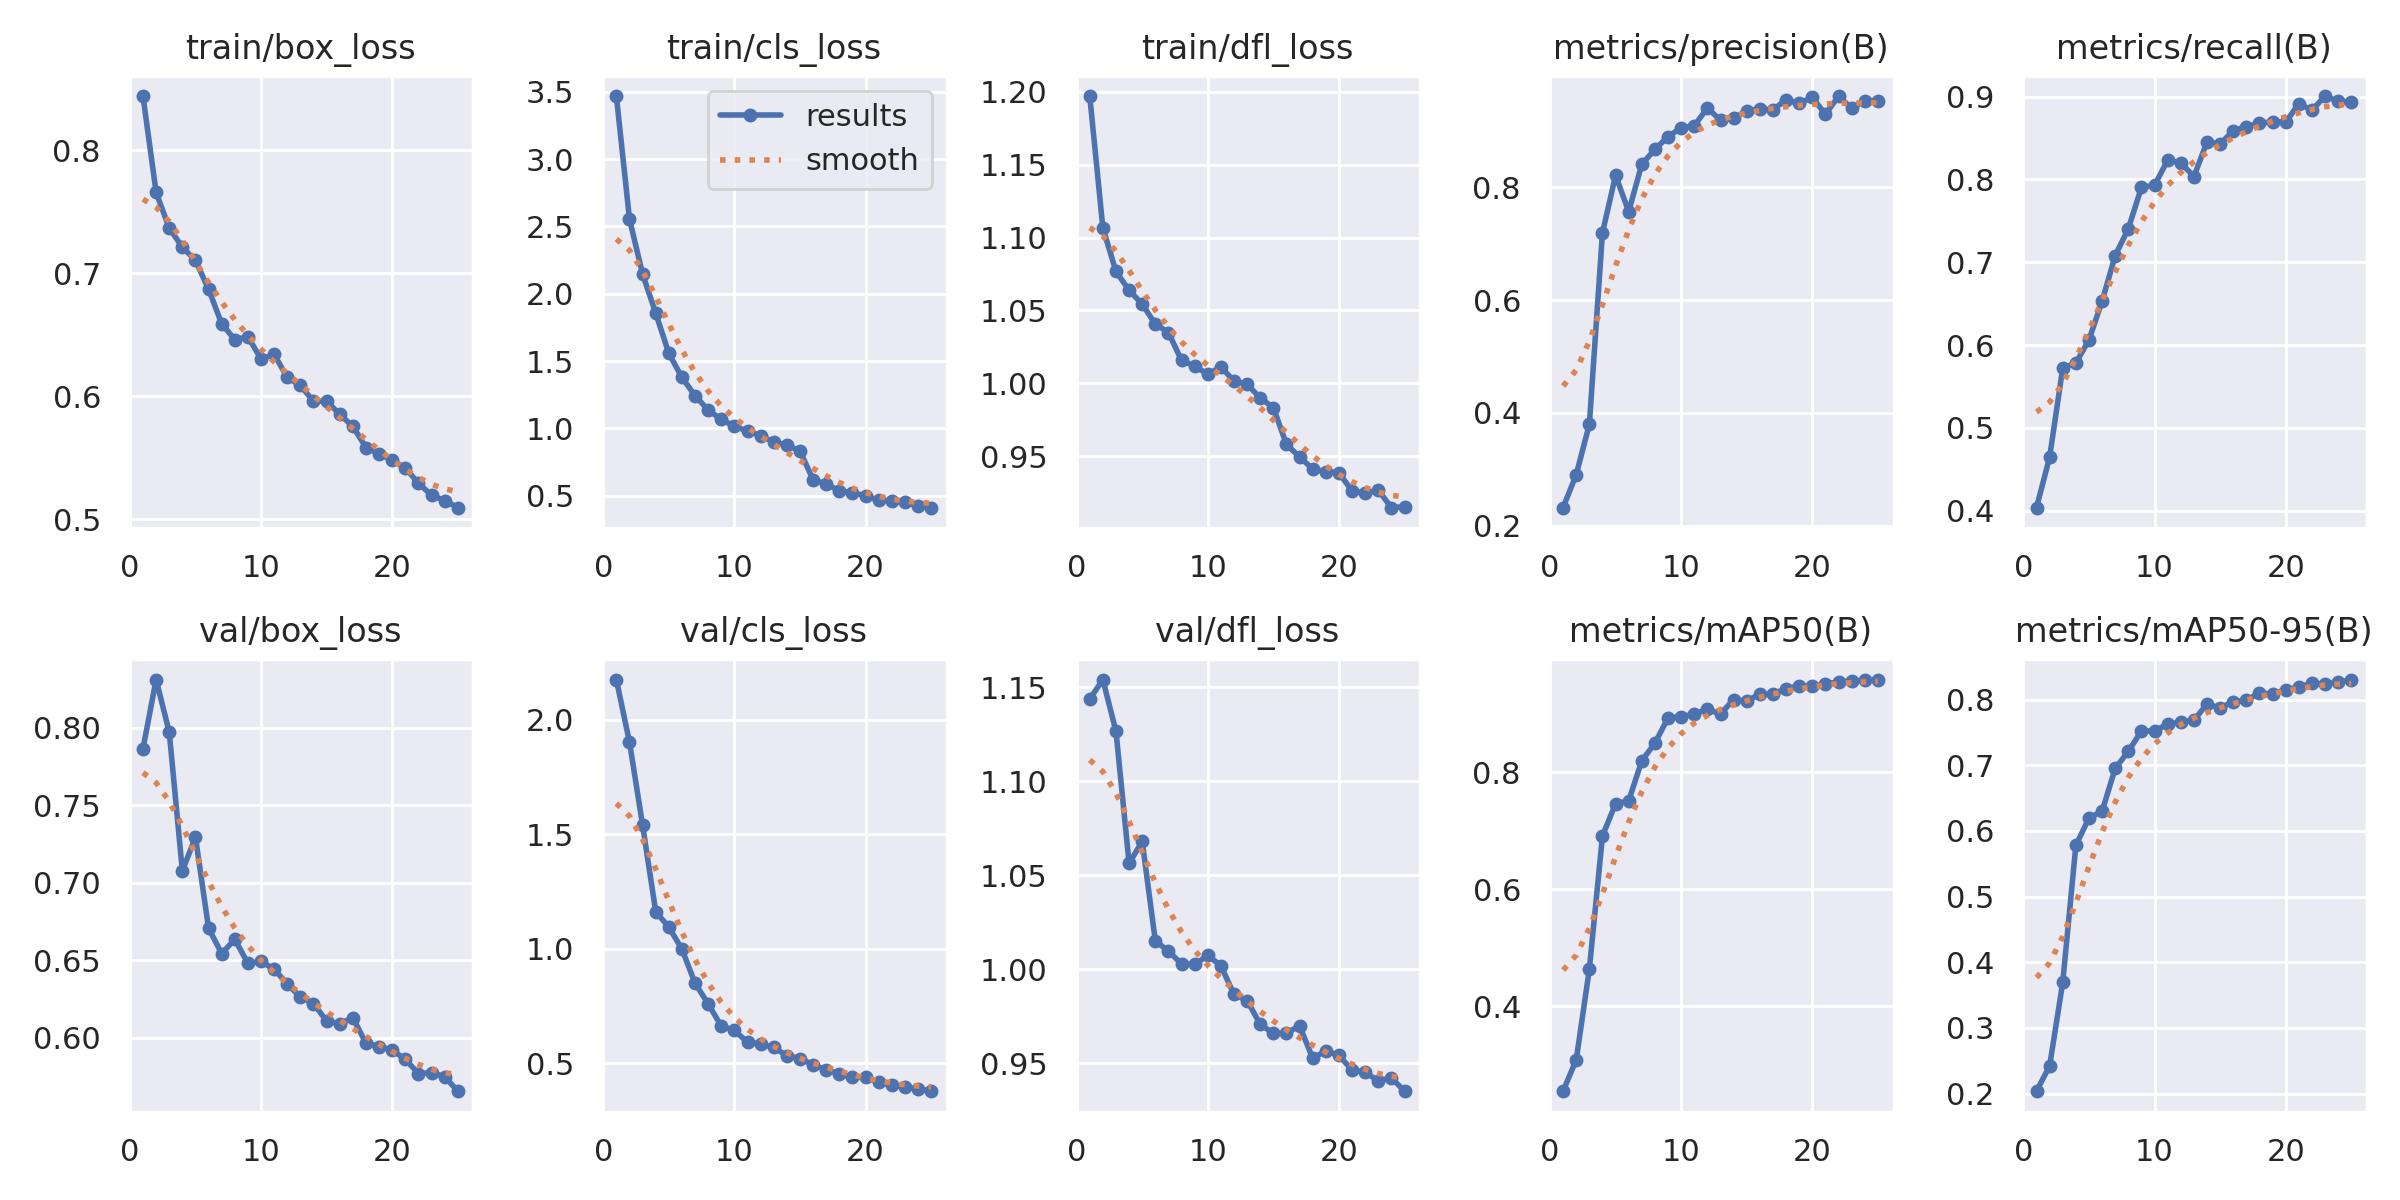

In [ ]:
from PIL import Image
from IPython.display import display

# Load your saved results.png (change path if needed)
img = Image.open("/content/drive/MyDrive/DSAN6500_Miniproject3/outputs/train_1/results.png")
display(img)


In [ ]:
from IPython.display import Image, display
Result_Final_model = pd.read_csv("/content/drive/MyDrive/DSAN6500_Miniproject3/outputs/train_1/results.csv")
Result_Final_model

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0       1  1655.96         0.84391         3.46694         1.19690   
1       2  1744.64         0.76563         2.55472         1.10661   
2       3  1833.12         0.73672         2.14616         1.07677   
3       4  1924.68         0.72115         1.85616         1.06382   
4       5  2015.10         0.71032         1.55775         1.05437   
5       6  2103.70         0.68701         1.37907         1.04065   
6       7  2192.26         0.65883         1.24378         1.03487   
7       8  2279.92         0.64601         1.13698         1.01578   
8       9  2368.76         0.64822         1.06692         1.01192   
9      10  2457.26         0.63021         1.01740         1.00622   
10     11  2546.62         0.63393         0.98080         1.01136   
11     12  2635.36         0.61515         0.94632         1.00152   
12     13  2724.62         0.60868         0.89992         0.99943   
13     14  2814.24         0.59578         0.87531         0.98992   
14     15  2901.66         0.59604         0.83372         0.98334   
15     16  2988.56         0.58514         0.61892         0.95815   
16     17  3073.09         0.57539         0.58704         0.94961   
17     18  3156.31         0.55820         0.53836         0.94127   
18     19  3240.78         0.55303         0.52338         0.93955   
19     20  3324.35         0.54797         0.50036         0.93874   
20     21  3408.94         0.54168         0.46681         0.92626   
21     22  3494.82         0.52916         0.46416         0.92497   
22     23  3580.84         0.51941         0.45085         0.92670   
23     24  3670.22         0.51498         0.42620         0.91487   
24     25  3755.18         0.50937         0.41310         0.91535   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                0.23251            0.40399           0.25474   
1                0.29087            0.46467           0.30824   
2                0.37998            0.57249           0.46343   
3                0.71919            0.57840           0.69127   
4                0.82087            0.60617           0.74652   
5                0.75670            0.65308           0.75142   
6                0.84063            0.70795           0.81998   
7                0.86682            0.74051           0.84987   
8                0.88951            0.79033           0.89340   
9                0.90510            0.79290           0.89492   
10               0.90891            0.82321           0.90012   
11               0.94012            0.82014           0.90787   
12               0.91847            0.80344           0.89992   
13               0.92186            0.84518           0.92463   
14               0.93553            0.84269           0.92149   
15               0.93801            0.85895           0.93448   
16               0.93697            0.86360           0.93363   
17               0.95478            0.86802           0.94348   
18               0.94826            0.86946           0.94791   
19               0.95893            0.86885           0.94714   
20               0.92901            0.89147           0.95131   
21               0.96102            0.88360           0.95494   
22               0.93974            0.90041           0.95630   
23               0.95337            0.89451           0.95737   
24               0.95281            0.89305           0.95851   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0               0.20377       0.78666       2.17508       1.14377  0.000175   
1               0.24190       0.83112       1.90272       1.15401  0.000336   
2               0.36918       0.79735       1.53983       1.12655  0.000484   
3               0.57787       0.70768       1.16223       1.05634  0.000464   
4               0.61960       0.72936       1.09476       1.06801  0.000443   
5               0.

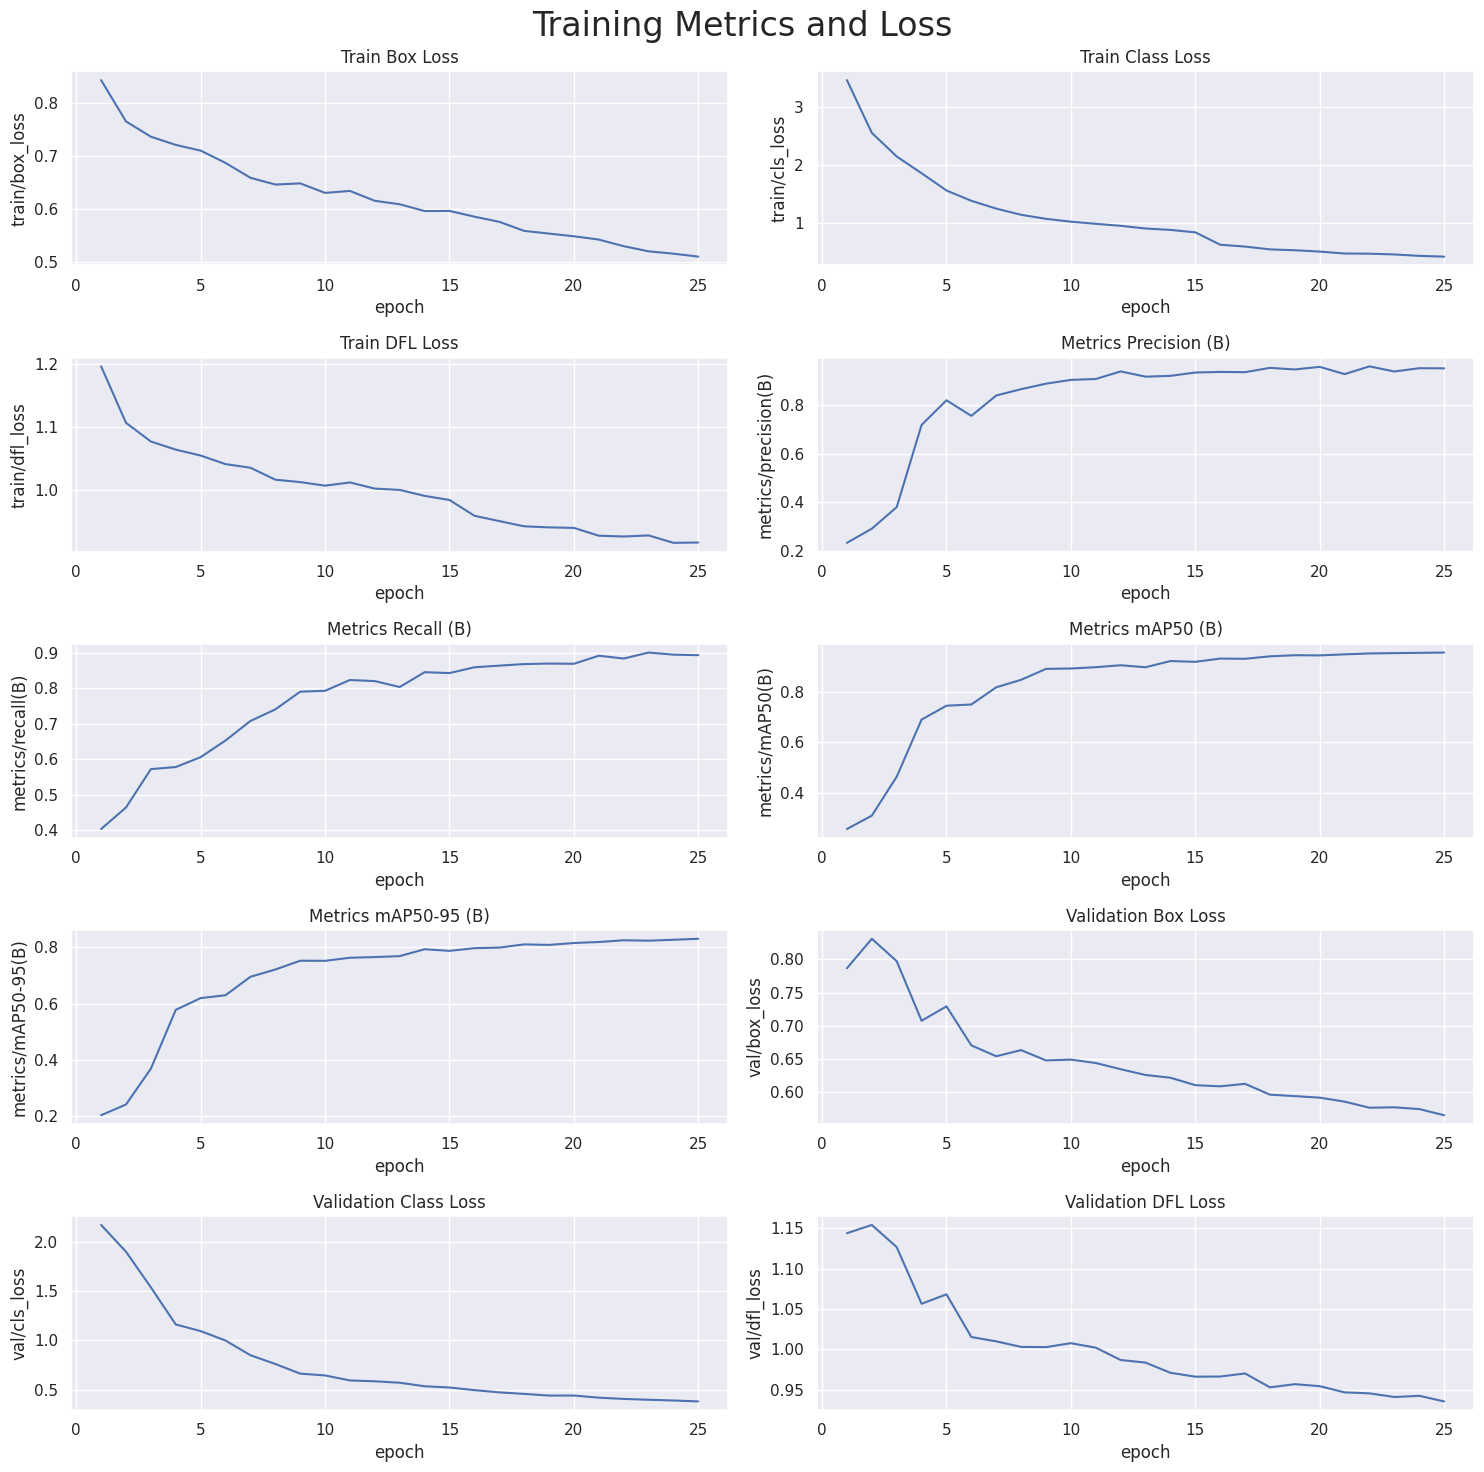

In [ ]:
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [ ]:

# Loading the best performing model
Valid_model = YOLO('/content/drive/MyDrive/DSAN6500_Miniproject3/outputs/train_1/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/DSAN6500_Miniproject3/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  3.94it/s]


                   all        801        944      0.953      0.893      0.958      0.832
           Green Light         87        122      0.885      0.696      0.826      0.507
             Red Light         74        108      0.877      0.723      0.828      0.511
       Speed Limit 100         52         52      0.963      0.942      0.986      0.881
       Speed Limit 110         17         17      0.944          1      0.995       0.92
       Speed Limit 120         60         60      0.981      0.876      0.989      0.916
        Speed Limit 20         56         56      0.985      0.982      0.986      0.869
        Speed Limit 30         71         74      0.952      0.959      0.988      0.924
        Speed Limit 40         53         55      0.906      0.982      0.988      0.879
        Speed Limit 50         68         71      0.994      0.803      0.948      0.855
        Speed Limit 60         76         76      0.919      0.908       0.96      0.876
        Speed Limit 7


0: 640x640 1 Speed Limit 30, 23.5ms
Speed: 4.4ms preprocess, 23.5ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 30, 9.0ms
Speed: 2.5ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 60, 9.5ms
Speed: 2.4ms preprocess, 9.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 10.6ms
Speed: 2.9ms preprocess, 10.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 80, 10.1ms
Speed: 4.6ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 90, 9.2ms
Speed: 2.6ms preprocess, 9.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.3ms
Speed: 2.7ms preprocess, 9.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 9.5ms
Speed: 2.7ms preprocess, 9.5ms inferen

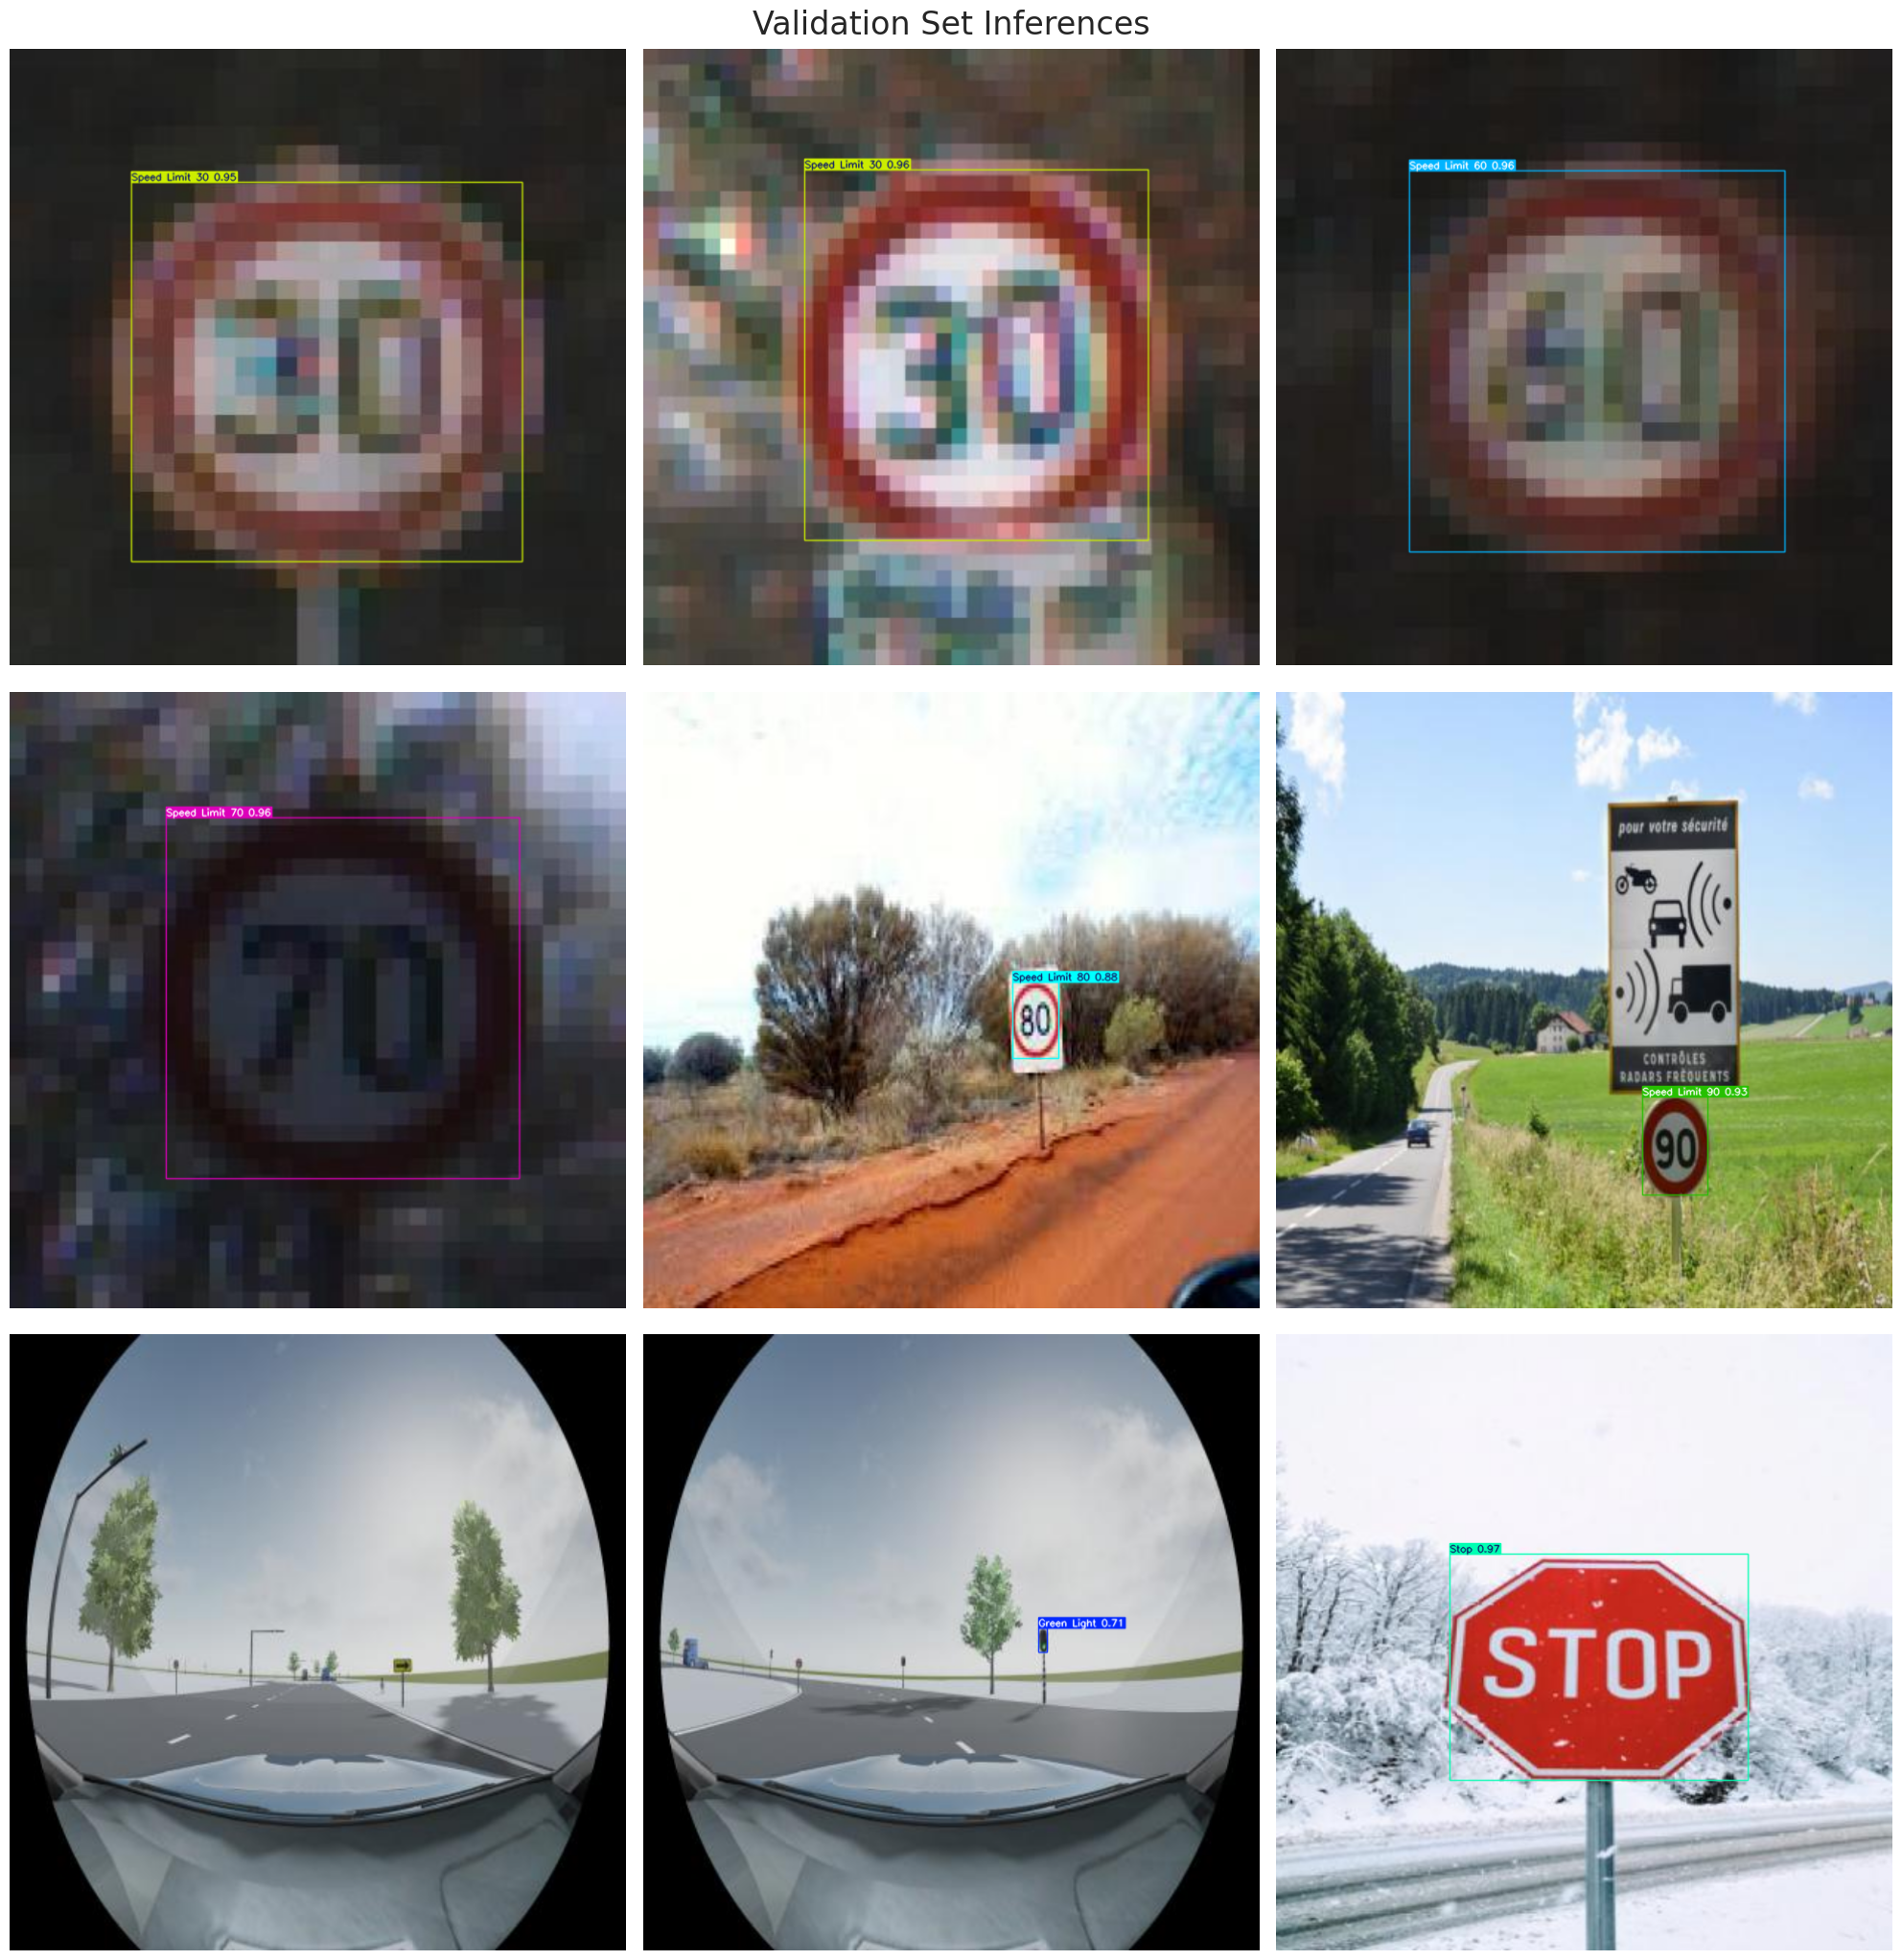

In [ ]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/content/drive/MyDrive/DSAN6500_Miniproject3/car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
video_path = "/content/drive/MyDrive/DSAN6500_Miniproject3/car/output.mp4"


In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/DSAN6500_Miniproject3/outputs/train_1/weights/best.pt")


In [ ]:
results = model.predict(
    source=video_path,
    save=True,
    conf=0.25,
    project="/content/drive/MyDrive/DSAN6500_Miniproject3/outputs/video",
    name="video_predictions",
    save_txt=False
)




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/508) /content/drive/MyDrive/DSAN6500_Miniproject3/car/output.mp4: 640x640 1 Stop, 7.4ms
video 1/1 (frame 2/508) /content/drive/MyDrive/DSAN6500_Miniproject3/car/output.mp4: 640x640 1 Stop, 7.4ms
video 1/1 (frame 3/508) /content/drive/MyDrive/DSAN6500_Miniproject3/car/output.mp4: 640x640 1 Stop, 7.4ms
video 1/1 (frame 4/508) /content/drive/MyDrive/DSAN6500_Miniproject3/car/output.mp4: 640x640 (no detections), 10.8ms
video 1/1 (frame 5

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/drive/MyDrive/DSAN6500_Miniproject3/outputs/train_1/weights/best.pt")

# Print the model architecture (PyTorch structure)
print(model.model)


DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    

| Class              | Images | Instances | Precision | Recall | mAP@0.5 | mAP@0.5:0.95 |
|--------------------|--------|-----------|-----------|--------|---------|---------------|
| All Classes        | 801    | 944       | 0.953     | 0.893  | 0.958   | 0.832         |
| Green Light        | 87     | 122       | 0.885     | 0.696  | 0.826   | 0.507         |
| Red Light          | 74     | 108       | 0.877     | 0.723  | 0.828   | 0.511         |
| Speed Limit 100    | 52     | 52        | 0.963     | 0.942  | 0.986   | 0.881         |
| Speed Limit 110    | 17     | 17        | 0.944     | 1.000  | 0.995   | 0.920         |
| Speed Limit 120    | 60     | 60        | 0.981     | 0.876  | 0.989   | 0.916         |
| Speed Limit 20     | 56     | 56        | 0.985     | 0.982  | 0.986   | 0.869         |
| Speed Limit 30     | 71     | 74        | 0.952     | 0.959  | 0.988   | 0.924         |
| Speed Limit 40     | 53     | 55        | 0.906     | 0.982  | 0.988   | 0.879         |
| Speed Limit 50     | 68     | 71        | 0.994     | 0.803  | 0.948   | 0.855         |
| Speed Limit 60     | 76     | 76        | 0.919     | 0.908  | 0.960   | 0.876         |
| Speed Limit 70     | 78     | 78        | 0.990     | 0.962  | 0.984   | 0.905         |
| Speed Limit 80     | 56     | 56        | 0.969     | 0.893  | 0.983   | 0.874         |
| Speed Limit 90     | 38     | 38        | 0.992     | 0.789  | 0.961   | 0.790         |
| Stop               | 81     | 81        | 0.982     | 0.988  | 0.995   | 0.933         |
